# Exploratory Data Analysis (EDA) on NYC Airbnb

![](https://images.unsplash.com/photo-1617688319108-cb3bdc88f587?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1935&q=80)

Airbnb is a service that allows people to rent their homes to those looking for affordable accommodation around the world. The company also provides its users with what they call experiences - paid activities designed and led by locals - such as surfing at sunset, hiking with rescue dogs, and food tours.

New York City – one of the world's most famous cities – plays an important part in international finance, politics, entertainment, and culture. It is not surprising that the home of Central Park and such wonderful museums, skyscrapers, and stores attracts countless tourists all year long. And just like in other big cities, travelers can pick and choose from several accommodation options, including Airbnb.

We will dive into an Airbnb dataset from 2019 to learn about rental options and how they are distributed around the city's five boroughs: Manhattan, Brooklyn, Bronx, Queens, and Staten Island.

## About the data

The dataset used in this project was made available by [Dgmonov](https://www.kaggle.com/dgomonov), and the original data can be found at [Inside Airbnb](http://insideairbnb.com/). The data was collected in 2019 and it's stored in a CSV file – it includes information about hosts and their listings, price, boroughs, neighborhoods, number of reviews, minimum nights, and more.


## Loading libraries

In [261]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from pandas.api.types import CategoricalDtype

%matplotlib inline

import seaborn as sns

## Loading dataset

In [262]:
airbnb_nyc = pd.read_csv(r'C:\Users\tamyg\Documents\Data Projects\Airbnb NYC 2019/AB_NYC_2019.csv')

## Getting an overview of the data

In [263]:
airbnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [264]:
# Checking the number of rows and columns
airbnb_nyc.shape

(48895, 16)

In [265]:
# Checking data types and non-null values count
airbnb_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Finding unique values in columns

In [266]:
# How many room types are available for rental?
airbnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [267]:
# How many neighborhood groups are there?
airbnb_nyc.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [268]:
# How many neighborhoods are there?
airbnb_nyc.neighbourhood.nunique()

221

In [269]:
# How many hosts are there?
airbnb_nyc.host_id.nunique()

37457

In [270]:
# How many listings are there?
airbnb_nyc.id.nunique()

48895

The dataset has 16 columns and 48,895 rows, but a significant number of values seem to be missing from the last_review and reviews_per_month columns. It includes information about the listings, such as id, host name, room type, price, and neighborhood. 

There are five different neighborhood groups, 221 neighborhoods, 37,457 hosts, 48,895 listings, and three types of room available for rental.

# Data Preparation

In this step, we are going to clean and transform the data in order to perform exploratory analysis later.

## Data Cleaning

### Checking for missing values

The info() method showed us a significant lower number of non-null rows in both the last_review and reviews_per_month columns. Let's take a closer look and check all columns that contain missing values and the number of missing values we are dealing with:

In [271]:
airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The columns with missing values are name, host_name, last_review, and reviews_per_month - with the last two missing over 10,000 rows of data each. The number of reviews per month can be interesting to analyze, so the best way to deal with this column is to replace all NaN values with zeros. As for the other three columns, they will not be used in this analysis and should be dropped.

### **Dropping Unnecessary Columns**

In [272]:
airbnb_nyc.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)

In [273]:
# Checking the changes
airbnb_nyc.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Replacing NaN values with zero

In [274]:
airbnb_nyc.fillna({'reviews_per_month': 0}, inplace=True)

In [275]:
# Checking the changes
airbnb_nyc.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

There are no more NaN values on this dataset.

### Checking for duplicate values

In [276]:
airbnb_nyc.duplicated().sum()

0

No duplicate values found.

### Renaming column labels

For the sake for readability, the neighbourhood_group column will be renamed as borough, and neighbourhood will be styled as neighborhood.

In [277]:
airbnb_nyc.rename(columns={'neighbourhood_group': 'borough', 'neighbourhood': 'neighborhood'}, inplace=True)

In [278]:
airbnb_nyc.head()

,id,host_id,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Exploratory Data Analysis and Visualization

### Summary Statistics

In [279]:
airbnb_nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


At first glance, the summary statistics shows us that the average price is 152.72, the average minimum nights stay is 7.03 nights, and the average number of reviews is 23.27 per listing. We also learn that a host has an average of 7.14 places listed and availability averages 112.78 vacant days per year.

Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers.

### Checking for outliers

Since we will be using with the price column to perform calculations, it is important to check it for outliers first.

In [280]:
airbnb_nyc.agg(
    {'price': ['mean', 'median', 'min', 'max', 'count']})

,price
mean,152.720687
median,106.000000
min,0.000000
max,10000.000000
count,48895.000000


The minimum value is set as zero, which does not make any sense since there are no free rooms on Airbnb - and the maximum value is set 10,000 - which just seems too high. Notice how the mean is considerably higher than the median. This is an indication that the data is skewed. 

Let's use a boxplot to get a better understanding of price distribution:

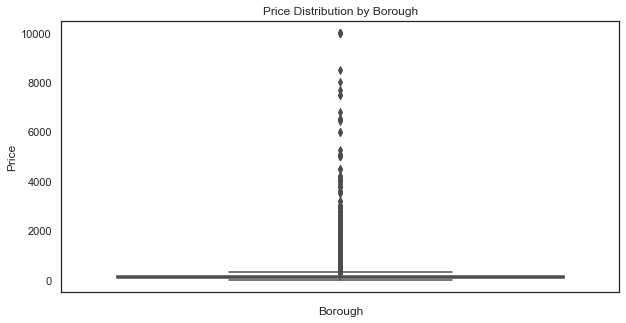

In [281]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_nyc).set_title('Price Distribution by Borough')
sns.set_theme(style='white')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

As expected, there are outliers present. In order to fix this issue, we will use quantile-based flooring and capping to treat the outliers.

### Quantile-based flooring and capping

There are a number of different ways to treat outliers - one of them is quantile-based flooring and capping. In this technique, we will do the flooring for the lower values and capping for the higher values. 

First, let's print the values in the 10th and 90th percentiles of the price column.

In [282]:
# low quantile
q_low = airbnb_nyc['price'].quantile(0.10)
q_low

49.0

In [283]:
# high quantile
q_high = airbnb_nyc['price'].quantile(0.90)
q_high

269.0

Looks like the 10th percentile is \\$49 and the 90th percentile is $269. Since we are dealing with Airbnb listings, it is not uncommon for a few places to be much more expensive than others, especially luxurious ones. 

Given that we are going to perform calculations in our data and the mean can be skewed by outliers, let's go ahead and implement the above technique by removing the values that don't apply to the specified range – set between \\$49 and $269. 

In [284]:
# removing rows with values below 0.10
airbnb_nyc = airbnb_nyc.drop(airbnb_nyc[airbnb_nyc.price < q_low].index)

In [285]:
# removing rows with values above 0.90
airbnb_nyc = airbnb_nyc.drop(airbnb_nyc[airbnb_nyc.price > q_high].index)

Let's create a new boxplot and check the result:

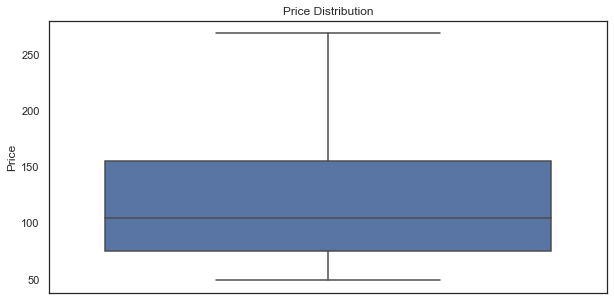

In [286]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_nyc).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

Now, we can further analyze the data.

### Total Listings by Borough

In [287]:
airbnb_pivot = pd.pivot_table(airbnb_nyc, index=['borough'], values='id', aggfunc=['count'], 
                              margins=True, margins_name='Total Count')
airbnb_pivot

,count
,id
borough,
Bronx,758
Brooklyn,16373
Manhattan,17513
Queens,4413
Staten Island,278
Total Count,39335


By creating a pivot table of the total number of listings grouped by the different boroughs, we learn that out of the 39,335 listings being analyzed, 17,513 of them are located in Manhattan and 16,373 in Brooklyn. Staten Island shows up last with only 278 listings.

We can use a pie chart to better visualize how the numbers are distributed in percentages:

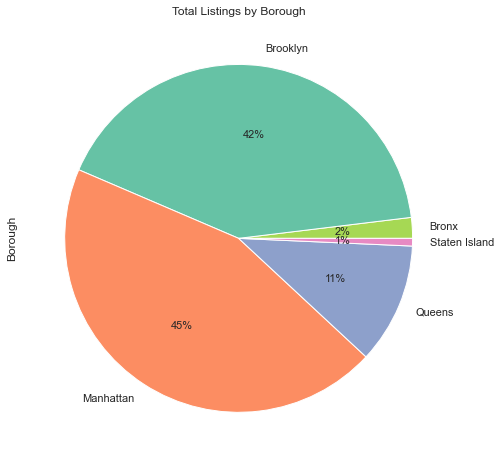

In [288]:
df2 = airbnb_nyc.groupby(['borough'])['id'].count()
df2.plot.pie(ylabel='Borough', title='Total Listings by Borough', 
             autopct='%1.0f%%', fontsize='11', colors=['#a6d854', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
             startangle=0, figsize=(10,8))
plt.show()

We can see that Manhattan has the highest number of listings - making up for 45% of the total - followed by Brooklyn with 42%. The other three boroughs have significantly less listings: Queens (11%), Bronx (2%), and Staten Island (1%).

### Price Distribution by Borough

In [289]:
# creating palette
my_pal = {'Brooklyn': '#66c2a5', 'Manhattan': '#fc8d62', 'Queens': '#8da0cb', 'Staten Island': '#e78ac3', 'Bronx': '#a6d854'}

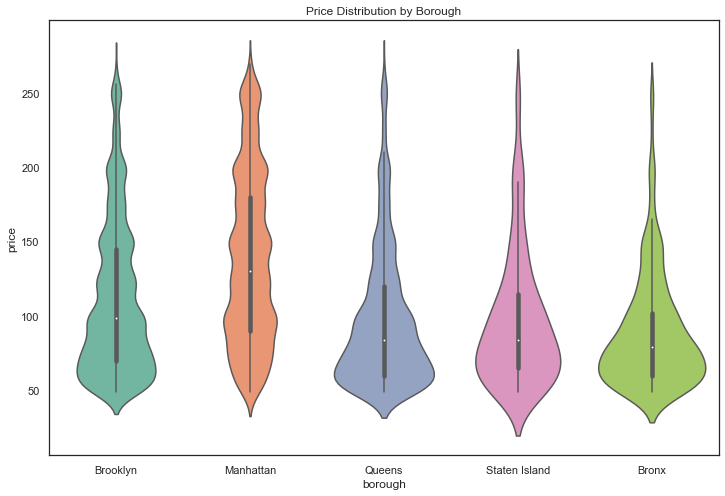

In [290]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="borough", y="price", data=airbnb_nyc, palette=my_pal).set_title('Price Distribution by Borough')
plt.show()

Using a violin plot can help us observe both the distribution and density of our data. In this case, we can see that Manhattan has a higher range of prices compared to the other boroughs and is also the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable borough.

### Average Price by Borough

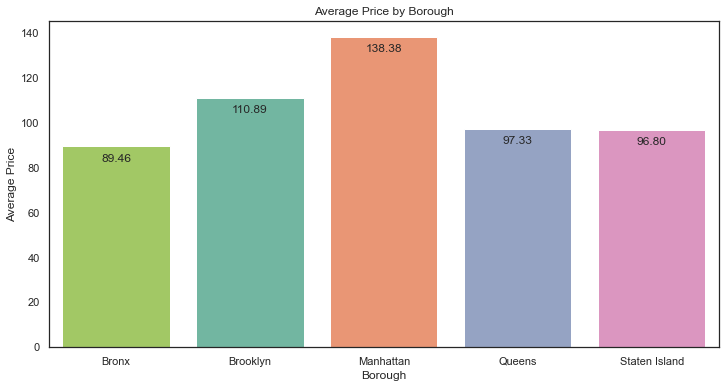

In [291]:
df = airbnb_nyc[['borough', 'price']]
df = airbnb_nyc.groupby(['borough'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
df = sns.barplot(x="borough", y="price", data=df, palette=my_pal)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 12, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.title('Average Price by Borough')
plt.show()

In the column chart above, we can see that the most expensive borough is Manhattan, with an average price of \\$138.38. The second most expensive borough is Brooklyn, costing an average of $110.89. The prices for the three other boroughs are cheaper, with the Bronx being the most affordable one, averaging \\$89.46. 

### Average Price by Room Type

In [292]:
# creating palette
my_pal2 = {'Entire home/apt': '#377eb8', 'Private room': '#ff7f00', 'Shared room': '#4daf4a'}

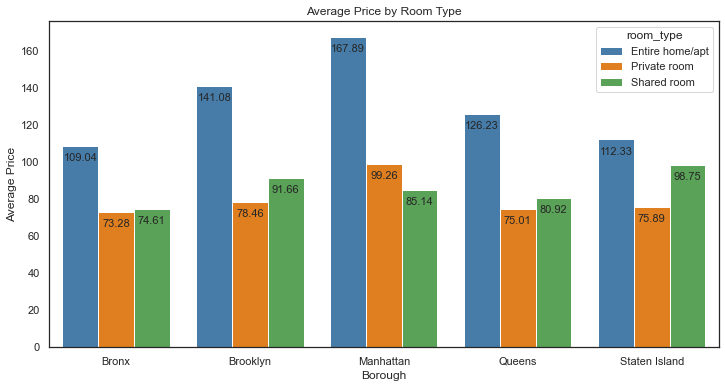

In [293]:
df = airbnb_nyc[['borough', 'room_type', 'price']]
df = df.groupby(['borough', 'room_type'], as_index=False)[['price']].mean()

plt.figure(figsize=(12, 6))
sns.set_theme(style='white')
df = sns.barplot(x="borough", y="price", data=df, hue='room_type', palette=my_pal2)
for p in df.patches:
    df.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
    
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()

In this column chart, the data is grouped by borough and room type. Manhattan maintains the highest prices for both entire homes and private rooms, and the average price for a shared room costs more than a private room in all the other boroughs. 

Considering that Manhattan and Brooklyn are likely the most popular boroughs among tourists, it makes sense that the prices are higher than in Queens, the Bronx, and Staten Island – mostly residential areas. 

It is strange that the average price for shared rooms in Staten Island is higher than in the other boroughs, including Manhattan. We can take a closer look by filtering the data and checking the total number of shared rooms listed on this borough.

In [294]:
airbnb_nyc[(airbnb_nyc['borough'] == 'Staten Island') & (airbnb_nyc['room_type'] == 'Shared room')]

,id,host_id,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
35232,27939842,50756378,Staten Island,Clifton,40.61542,-74.08496,Shared room,95,3,0,0.00,7,37
35265,27962805,50756378,Staten Island,Clifton,40.61672,-74.08550,Shared room,75,2,1,0.10,7,37
35268,27964104,50756378,Staten Island,Clifton,40.61575,-74.08658,Shared room,75,2,0,0.00,7,37
36327,28909477,50756378,Staten Island,Clifton,40.61595,-74.08535,Shared room,150,2,2,0.22,7,312


As we can see, there are only four shared rooms listed on Staten Island. Given that only those listings are responsible for the average price of the entire category, we shouldn't try to compare it with the most popular and expensive boroughs that have thousands of listings available.

###  Visualizing Listings by Room Type

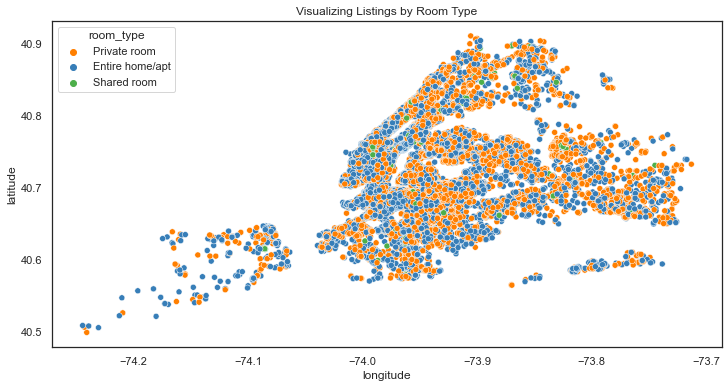

In [295]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.scatterplot(airbnb_nyc.longitude, airbnb_nyc.latitude, 
                hue=airbnb_nyc.room_type, palette=my_pal2).set_title('Visualizing Listings by Room Type')
plt.ioff()

In this scatter plot map, it is easy to spot the different room types available for rental in NYC. Manhattan is the only borough that has more entire homes listed than any other type of accommodation. As for the other boroughs, private room is the most popular room type, presenting the most offers.

### Room Availability by Borough

In [296]:
airbnb_nyc.groupby(['borough'])['availability_365'].mean()

borough
Bronx            169.184697
Brooklyn          97.789837
Manhattan        103.723063
Queens           141.524813
Staten Island    196.471223
Name: availability_365, dtype: float64

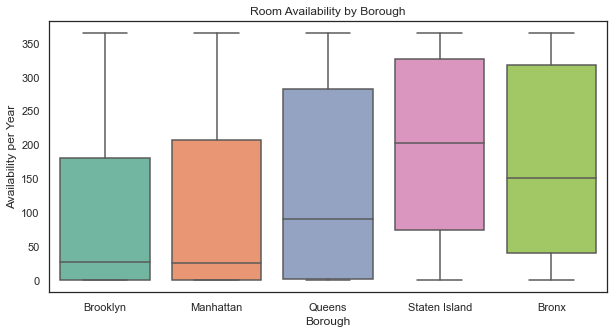

In [297]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=airbnb_nyc, x='borough', y='availability_365', palette=my_pal).set_title('Room Availability by Borough')
sns.set_theme(style='white')
plt.xlabel('Borough')
plt.ylabel('Availability per Year')
plt.show()

Availability corresponds to the number of days in a year that a listing is vacant. It can help us determine which areas are most popular throughout the year. 

The average availability by borough shows us that listings in Manhattan and Brooklyn have fewer vacant days compared to the other boroughs. This can be explained by the higher number of tourists that these two areas receive all year round.

### Visualizing Availability by Borough

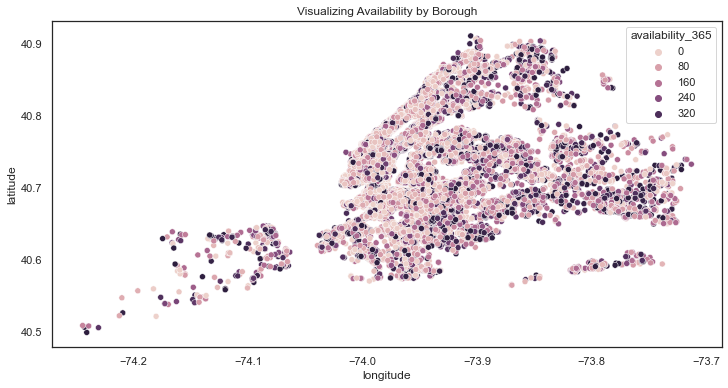

In [298]:
plt.figure(figsize=(12,6))
sns.scatterplot(airbnb_nyc.longitude, airbnb_nyc.latitude, 
                hue=airbnb_nyc.availability_365).set_title('Visualizing Availability by Borough')
plt.ioff()

A scatter plot map can help determine availability in the different boroughs. We can see that Manhattan and Brooklyn are less available throughout the year in comparison to the other boroughs.

### Top 10 Neighborhoods with the Most Listings

In [299]:
df = airbnb_nyc.groupby(['neighborhood'])['id'].count().nlargest(10)
df

neighborhood
Williamsburg          3415
Bedford-Stuyvesant    2963
Harlem                2311
Bushwick              1846
Upper West Side       1619
East Village          1590
Hell's Kitchen        1576
Upper East Side       1561
Crown Heights         1257
Midtown               1002
Name: id, dtype: int64

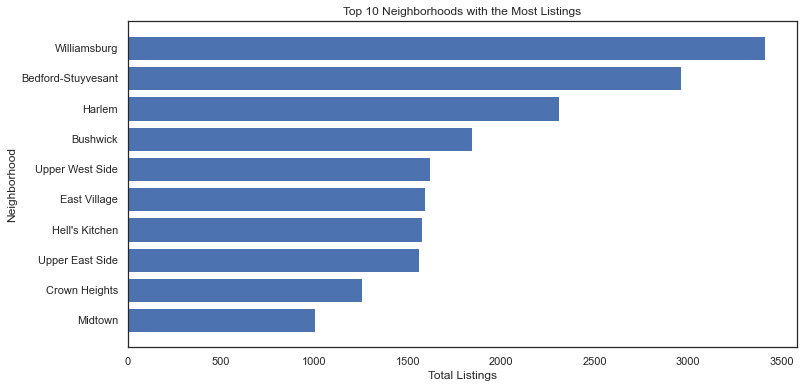

In [300]:
plt.figure(figsize=(12,6))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighborhoods with the Most Listings")
plt.ylabel("Neighborhood")
plt.xlabel("Total Listings")

plt.barh(x, y)
plt.show()

The neighborhoods with the most listings are in Manhattan and Brooklyn – which is understandable – given that tourists are more likely to stay in those areas. Williamsburg, in Brooklyn, appears first with 3,415 listings. In Manhattan, Harlem has the most listings, totaling 2,311 offers.

### Average  Minimum Nights by Borough

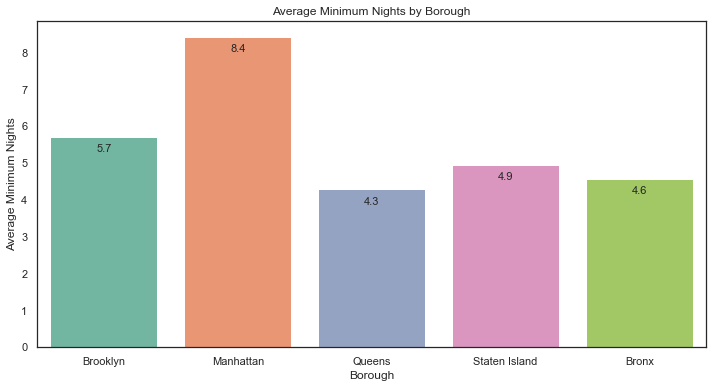

In [301]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="borough", y="minimum_nights", data=airbnb_nyc, palette=my_pal, ci=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size = 11, 
                   xytext = (0, -12), textcoords = 'offset points')
plt.xlabel('Borough')
plt.ylabel('Average Minimum Nights')
plt.title('Average Minimum Nights by Borough')
plt.show()

Every place listed on Airbnb has its own policy when it comes to the minimum number of nights that a guest can book a rental place. Manhattan has the highest number of minimum nights - 8.4 nights - while Brooklyn appears in second place, with a minimum of 5.7 nights.

### Key Findings

* Manhattan has the highest number of listings and is the most expensive borough to rent entire homes and private rooms.
* Brooklyn has the second-highest number of listings and is the second most expensive borough for rentals.
* Manhattan and Brooklyn make up for 87% of listings available in NYC.
* The Bronx is the most affordable borough, while Staten Island has the lowest number of listings.
* Listings in Manhattan and Brooklyn are less available throughout the year in comparison to the other boroughs.
* Manhattan and Brooklyn have the highest number of minimum nights per stay.
* The top 10 neighborhoods with the most listings are located either in Manhattan or Brooklyn, with Harlem and Williamsburg presenting leading numbers in each borough, respectively.

### Conclusion

We can conclude from this analysis that Manhattan is the #1 borough of NYC when it comes to the number of listings and highest rental prices. Given that Manhattan is world-famous for its museums, stores, parks, and theaters — and its substantial number of tourists throughout the year, it makes perfect sense that prices are much higher in this borough.

Brooklyn comes in second, showing a significant number of listings and more affordable prices if compared to Manhattan. With most listings located in Williamsburg and Bedford Stuyvesant — two neighborhoods strategically close to Manhattan — tourists get the chance to enjoy both boroughs equally while spending less.

As for the other boroughs — Queens, Bronx, and Staten Island — it becomes clear that there aren’t as many listing options available, especially on Staten Island. Considering that those are rather residential areas, it is possible that many guests choose those locations to save up money or perhaps to visit family and friends who live in the area.
